In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import os

folder_path = "/content/drive/MyDrive/datasets"

# قراءة cumulative
cumulative = pd.read_csv(
    os.path.join(folder_path, "cumulative_2025.10.03_02.50.27.csv"),
    comment="#",
    skipinitialspace=True
)

# قراءة k2pandc
k2pandc = pd.read_csv(
    os.path.join(folder_path, "k2pandc_2025.10.03_02.47.49.csv"),
    comment="#",
    skipinitialspace=True
)

# قراءة TOI
toi = pd.read_csv(
    os.path.join(folder_path, "TOI_2025.10.03_02.47.18.csv"),
    comment="#",
    skipinitialspace=True
)

print("Cumulative:", cumulative.shape)
print("K2 PandC:", k2pandc.shape)
print("TOI:", toi.shape)

print("\nعرض أول 3 صفوف من كل ملف:\n")
print("Cumulative\n", cumulative.head(3))
print("K2 PandC\n", k2pandc.head(3))
print("TOI\n", toi.head(3))


Cumulative: (9564, 49)
K2 PandC: (4004, 94)
TOI: (7703, 65)

عرض أول 3 صفوف من كل ملف:

Cumulative
       kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2  10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...  \
0      1.000              0              0              0              0  ...   
1      0.969              0              0              0              0  ...   
2      0.000              0              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \
0           -81.0      4.467           0.064          -0.096     0.927   
1           -81.0      4.467           0.064          -0.096     0.927   
2          -176.0      4.544           0.044          -0.176

In [26]:
# حساب نسبة النل لكل عمود في cumulative
null_percentage_cumulative = cumulative.isnull().mean() * 100
null_percentage_cumulative = null_percentage_cumulative.sort_values(ascending=False)

# تحويل لكل الأعمدة لاسترينج كامل
null_str_cumulative = null_percentage_cumulative.to_string()

print("نسبة النل لكل عمود في cumulative:\n", null_str_cumulative)


نسبة النل لكل عمود في cumulative:
 koi_teq_err1         100.000000
koi_teq_err2         100.000000
kepler_name           71.277708
koi_score             15.788373
koi_steff_err2         5.050188
koi_srad_err1          4.893350
koi_steff_err1         4.893350
koi_slogg_err2         4.893350
koi_slogg_err1         4.893350
koi_srad_err2          4.893350
koi_time0bk_err1       4.746968
koi_period_err1        4.746968
koi_period_err2        4.746968
koi_time0bk_err2       4.746968
koi_impact_err1        4.746968
koi_depth_err1         4.746968
koi_depth_err2         4.746968
koi_duration_err1      4.746968
koi_duration_err2      4.746968
koi_impact_err2        4.746968
koi_model_snr          3.795483
koi_srad               3.795483
koi_slogg              3.795483
koi_steff              3.795483
koi_depth              3.795483
koi_prad_err1          3.795483
koi_prad               3.795483
koi_impact             3.795483
koi_prad_err2          3.795483
koi_teq                3.795483
koi_t

In [27]:
# حساب نسبة النل وتحويلها لاسترينج كامل
null_percentage_k2pandc = k2pandc.isnull().mean() * 100
null_percentage_k2pandc = null_percentage_k2pandc.sort_values(ascending=False)

# تحويل لكل الأعمدة لاسترينج كامل
null_str = null_percentage_k2pandc.to_string()

print("\nنسبة النل لكل عمود في k2pandc:\n", null_str)



نسبة النل لكل عمود في k2pandc:
 pl_orbeccenerr1    94.355644
pl_orbeccenerr2    94.355644
pl_bmasseerr2      90.359640
pl_bmasseerr1      90.359640
pl_bmassjerr1      90.359640
pl_bmassjerr2      90.359640
pl_orbeccen        89.460539
pl_orbeccenlim     89.460539
pl_bmasse          89.310689
pl_bmassprov       89.310689
pl_bmassj          89.310689
pl_bmasselim       89.310689
pl_bmassjlim       89.310689
st_spectype        89.185814
pl_insolerr1       88.836164
pl_insolerr2       88.836164
pl_insol           84.290709
pl_insollim        84.290709
pl_eqterr1         83.091908
pl_eqterr2         83.091908
pl_orbsmaxerr1     79.895105
pl_orbsmaxerr2     79.895105
pl_orbsmaxlim      79.720280
pl_orbsmax         79.720280
pl_eqt             78.896104
pl_eqtlim          78.896104
st_meterr2         58.541459
st_meterr1         58.541459
st_metratio        57.842158
st_met             57.767233
st_metlim          57.767233
st_masserr2        51.873127
st_masserr1        51.723277
st_masslim

In [28]:
import numpy as np
import pandas as pd

# دالة لحساب الكتلة من نصف القطر
def estimate_mass(radius):
    if pd.isnull(radius):
        return np.nan
    if radius <= 1.5:
        return radius ** 3.7  # كواكب صخرية
    else:
        return radius ** 1.5  # كواكب غازية

# هندلة الميسينج مباشرة في عمود pl_bmasse
mask_missing = df['pl_bmasse'].isnull() & df['pl_rade'].notnull()
df.loc[mask_missing, 'pl_bmasse'] = df.loc[mask_missing, 'pl_rade'].apply(estimate_mass)

# تعويض أي ميسينج باقي بالوسيط
df['pl_bmasse'].fillna(df['pl_bmasse'].median(), inplace=True)


/tmp/ipython-input-318268644.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pl_bmasse'].fillna(df['pl_bmasse'].median(), inplace=True)


In [29]:
# حساب نسبة النل لكل عمود في TOI
null_percentage_toi = toi.isnull().mean() * 100
null_percentage_toi = null_percentage_toi.sort_values(ascending=False)

# تحويل لكل الأعمدة لاسترينج كامل
null_str_toi = null_percentage_toi.to_string()

print("\nنسبة النل لكل عمود في TOI:\n", null_str_toi)



نسبة النل لكل عمود في TOI:
 pl_insolerr2       100.000000
pl_eqterr1         100.000000
pl_insollim        100.000000
pl_eqterr2         100.000000
pl_eqtlim          100.000000
pl_insolerr1       100.000000
st_loggerr1         29.482020
st_loggerr2         29.482020
st_raderr1          25.483578
st_raderr2          25.483578
pl_radeerr1         21.069713
pl_radeerr2         21.069713
st_logg             11.112554
st_disterr1          9.178242
st_disterr2          9.178242
st_rad               6.581851
pl_rade              6.568869
st_tefferr2          6.153447
st_tefferr1          6.153447
pl_eqt               4.037388
st_dist              2.791120
pl_insol             2.284824
st_teff              2.090095
st_pmralim           1.739582
st_pmra              1.739582
st_pmdecerr1         1.739582
st_pmraerr2          1.739582
st_pmdeclim          1.739582
st_pmraerr1          1.739582
st_pmdecerr2         1.739582
st_pmdec             1.739582
pl_orbpererr1        1.700636
pl_orbperer

In [30]:
import pandas as pd

# --- 1. إزالة أي أعمدة مكررة أوليًا (اختياري قبل الـ rename) ---
cumulative = cumulative.loc[:, ~cumulative.columns.duplicated()]
k2pandc   = k2pandc.loc[:, ~k2pandc.columns.duplicated()]
toi       = toi.loc[:, ~toi.columns.duplicated()]

# --- 2. توحيد أسماء الأعمدة المهمة ---
rename_map = {
    # Orbital Period
    "pl_orbper": "orbital_period",
    "koi_period": "orbital_period",
    "Orbital_Period_Days": "orbital_period",

    # Transit Duration
    "pl_trandurh": "transit_duration",
    "koi_duration": "transit_duration",

    # Transit Depth
    "pl_trandep": "transit_depth",
    "koi_depth": "transit_depth",

    # Planet Radius
    "pl_rade": "planet_radius",
    "koi_prad": "planet_radius",
    "Planet_Radius_Earth": "planet_radius",

    # Planet Mass
    "pl_bmasse": "planet_mass",

    # Temperature
    "pl_eqt": "eq_temp",
    "koi_teq": "eq_temp",
    "Stellar_Teff_K": "st_teff",

    # Insolation
    "pl_insol": "insolation",
    "koi_insol": "insolation",

    # Stellar Radius
    "st_rad": "st_rad",
    "koi_srad": "st_rad",

    # Stellar Mass
    "st_mass": "st_mass",

    # Surface Gravity
    "st_logg": "st_logg",
    "koi_slogg": "st_logg",

    # Metallicity
    "st_met": "st_met",

    # Distance
    "st_dist": "st_dist",
    "sy_dist": "st_dist",

    # Brightness
    "st_tmag": "st_mag",
    "sy_vmag": "st_mag",
    "sy_gaiamag": "st_mag",

    # Labels
    "koi_disposition": "disposition",
    "Disposition": "disposition",
    "Disposition_Source": "disposition"
}

cumulative = cumulative.rename(columns=rename_map)
k2pandc   = k2pandc.rename(columns=rename_map)
toi       = toi.rename(columns=rename_map)

# --- 3. إزالة الأعمدة المكررة بعد الـ rename ---
cumulative = cumulative.loc[:, ~cumulative.columns.duplicated()]
k2pandc   = k2pandc.loc[:, ~k2pandc.columns.duplicated()]
toi       = toi.loc[:, ~toi.columns.duplicated()]

# --- 4. الأعمدة المشتركة النهائية ---
common_cols = [
    'orbital_period', 'transit_duration', 'transit_depth',
    'planet_radius', 'planet_mass', 'eq_temp', 'insolation',
    'st_teff', 'st_rad', 'st_mass', 'st_logg', 'st_met',
    'st_dist', 'st_mag', 'disposition'
]

# --- 5. عمل Reindex + دمج ---
all_data = pd.concat([
    cumulative.reindex(columns=common_cols),
    k2pandc.reindex(columns=common_cols),
    toi.reindex(columns=common_cols)
], axis=0, ignore_index=True)

print("البيانات المدموجة:", all_data.shape)
print(all_data.head())


البيانات المدموجة: (21271, 15)
   orbital_period  transit_duration  transit_depth  planet_radius  \
0        9.488036           2.95750          615.8           2.26   
1       54.418383           4.50700          874.8           2.83   
2       19.899140           1.78220        10829.0          14.60   
3        1.736952           2.40641         8079.2          33.46   
4        2.525592           1.65450          603.3           2.75   

   planet_mass  eq_temp  insolation  st_teff  st_rad  st_mass  st_logg  \
0          NaN    793.0       93.59      NaN   0.927      NaN    4.467   
1          NaN    443.0        9.11      NaN   0.927      NaN    4.467   
2          NaN    638.0       39.30      NaN   0.868      NaN    4.544   
3          NaN   1395.0      891.96      NaN   0.791      NaN    4.564   
4          NaN   1406.0      926.16      NaN   1.046      NaN    4.438   

   st_met  st_dist  st_mag     disposition  
0     NaN      NaN     NaN       CONFIRMED  
1     NaN      NaN 

In [31]:


null_percentage = all_data.isnull().mean() * 100

# ترتيب الأعمدة حسب النسبة من الأعلى للأقل
null_percentage = null_percentage.sort_values(ascending=False)

# عرض النتائج
print(null_percentage)


planet_mass         97.987871
st_met              92.050209
st_mass             90.179117
st_teff             51.017818
st_dist             46.669174
st_mag              45.268206
disposition         36.213624
transit_depth       20.530299
transit_duration    18.823751
insolation          18.203187
eq_temp             18.019839
st_logg             13.520756
planet_radius        8.057919
st_rad               4.785859
orbital_period       0.818015
dtype: float64


In [32]:
all_data.columns

Index(['orbital_period', 'transit_duration', 'transit_depth', 'planet_radius',
       'planet_mass', 'eq_temp', 'insolation', 'st_teff', 'st_rad', 'st_mass',
       'st_logg', 'st_met', 'st_dist', 'st_mag', 'disposition'],
      dtype='object')

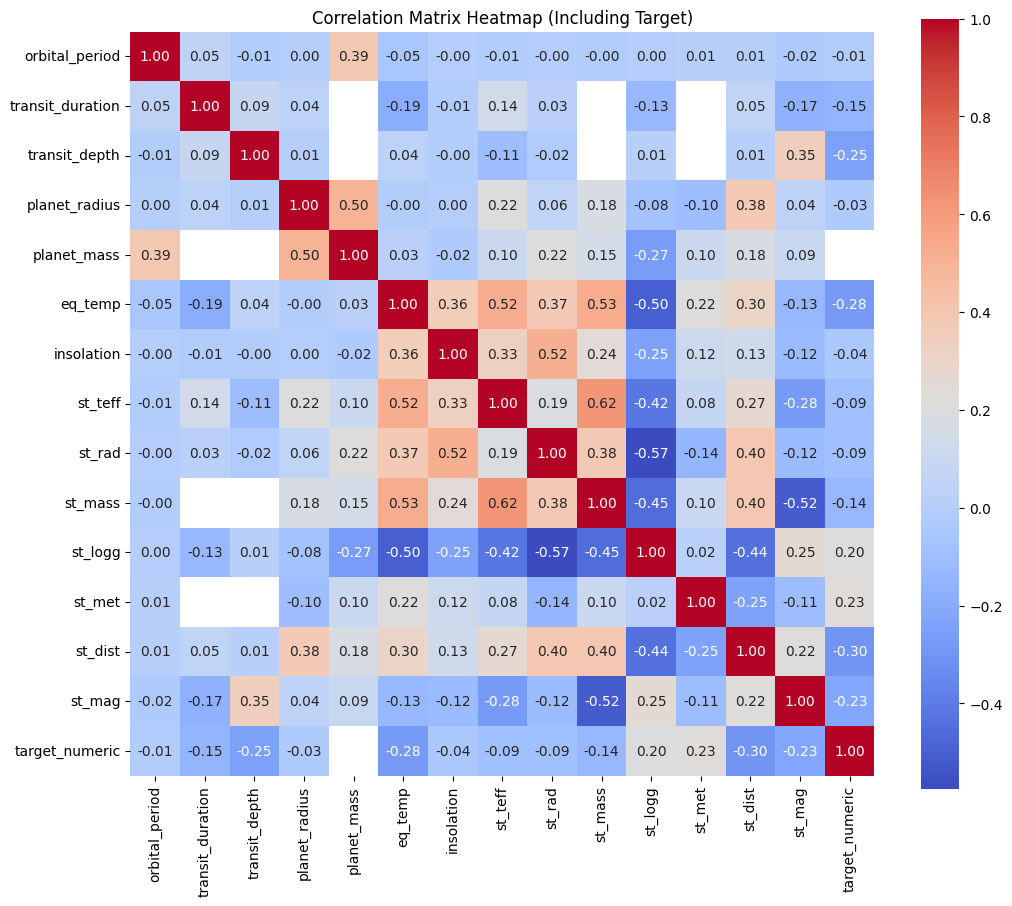

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

df_copy = all_data.copy()

# تحويل العمود target للفئات 0,1,2
# نفترض القيم عندك: 'FALSE POSITIVE', 'CANDIDATE', 'CONFIRMED'
df_copy['target_numeric'] = df_copy['disposition'].map({
    'FALSE POSITIVE': 0,
    'CANDIDATE': 1,
    'CONFIRMED': 2
})

# اختيار الأعمدة العددية + العمود الجديد للـ target
numeric_df = df_copy.select_dtypes(include=['float64', 'int64'])
numeric_df['target_numeric'] = df_copy['target_numeric']

# حساب Correlation matrix
corr_matrix = numeric_df.corr()

# رسم Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap (Including Target)')
plt.show()

In [34]:
all_data.head()

,orbital_period,transit_duration,transit_depth,planet_radius,planet_mass,eq_temp,insolation,st_teff,st_rad,st_mass,st_logg,st_met,st_dist,st_mag,disposition
0,9.488036,2.95750,615.8,2.26,NaN,793.0,93.59,NaN,0.927,NaN,4.467,NaN,NaN,NaN,CONFIRMED
1,54.418383,4.50700,874.8,2.83,NaN,443.0,9.11,NaN,0.927,NaN,4.467,NaN,NaN,NaN,CONFIRMED
2,19.899140,1.78220,10829.0,14.60,NaN,638.0,39.30,NaN,0.868,NaN,4.544,NaN,NaN,NaN,CANDIDATE
3,1.736952,2.40641,8079.2,33.46,NaN,1395.0,891.96,NaN,0.791,NaN,4.564,NaN,NaN,NaN,FALSE POSITIVE
4,2.525592,1.65450,603.3,2.75,NaN,1406.0,926.16,NaN,1.046,NaN,4.438,NaN,NaN,NaN,CONFIRMED


In [35]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21271 entries, 0 to 21270
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   orbital_period    21097 non-null  float64
 1   transit_duration  17267 non-null  float64
 2   transit_depth     16904 non-null  float64
 3   planet_radius     19557 non-null  float64
 4   planet_mass       428 non-null    float64
 5   eq_temp           17438 non-null  float64
 6   insolation        17399 non-null  float64
 7   st_teff           10419 non-null  float64
 8   st_rad            20253 non-null  float64
 9   st_mass           2089 non-null   float64
 10  st_logg           18395 non-null  float64
 11  st_met            1691 non-null   float64
 12  st_dist           11344 non-null  float64
 13  st_mag            11642 non-null  float64
 14  disposition       13568 non-null  object 
dtypes: float64(14), object(1)
memory usage: 2.4+ MB


In [36]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

# نسخ الداتا
df = all_data.copy()

# 1️⃣ شيل العمود اللي missing كتير
df = df.drop(columns=['planet_mass'])

# 2️⃣ تحديد الأعمدة الرقمية المهمة وتجاهل أي عمود غير موجود
numeric_cols = [
    'st_mass', 'st_met', 'st_rad', 'st_teff', 'st_logg', 'st_mag', 'st_dist','sy_gaiamag',
    'transit_depth', 'transit_duration', 'insolation', 'eq_temp', 'planet_radius', 'orbital_period'
]
numeric_cols = [col for col in numeric_cols if col in df.columns]

# 3️⃣ KNN Imputer لتعويض missing القيم الرقمية
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# 4️⃣ Regression لتقدير st_mass للأماكن اللي كانت missing
mass_features = [col for col in ['st_rad', 'st_teff', 'st_logg', 'st_mag'] if col in df.columns]
mass_model = RandomForestRegressor(n_estimators=100, random_state=42)
mass_model.fit(df[mass_features], df['st_mass'])
df['st_mass'] = mass_model.predict(df[mass_features])

# 5️⃣ Regression لتقدير st_met للأماكن اللي كانت missing
met_features = [col for col in ['st_mass', 'st_rad', 'st_teff', 'st_logg', 'st_mag', 'sy_gaiamag'] if col in df.columns]
met_model = RandomForestRegressor(n_estimators=100, random_state=42)
met_model.fit(df[met_features], df['st_met'])
df['st_met'] = met_model.predict(df[met_features])


# ✅ عرض النتائج
print(df[['st_mass','st_met']].head())


    st_mass    st_met
0  0.779178 -0.060300
1  0.510416 -0.201658
2  0.910732 -0.216908
3  0.834439  0.069248
4  0.857153 -0.000965


In [37]:
# خريطة التحويل للموديل
class_mapping = {
    'CONFIRMED': 2,
    'CANDIDATE': 1,
    'FALSE POSITIVE': 0
}

# إنشاء عمود جديد numeric للـ target
df['disposition_num'] = df['disposition'].map(class_mapping)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21271 entries, 0 to 21270
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   orbital_period    21271 non-null  float64
 1   transit_duration  21271 non-null  float64
 2   transit_depth     21271 non-null  float64
 3   planet_radius     21271 non-null  float64
 4   eq_temp           21271 non-null  float64
 5   insolation        21271 non-null  float64
 6   st_teff           21271 non-null  float64
 7   st_rad            21271 non-null  float64
 8   st_mass           21271 non-null  float64
 9   st_logg           21271 non-null  float64
 10  st_met            21271 non-null  float64
 11  st_dist           21271 non-null  float64
 12  st_mag            21271 non-null  float64
 13  disposition       13568 non-null  object 
 14  disposition_num   13546 non-null  float64
dtypes: float64(14), object(1)
memory usage: 2.4+ MB


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Features مهمة للتنبؤ بالـ target
target_features = [
    'st_mass', 'st_met', 'st_rad', 'st_teff', 'st_logg',
    'st_mag', 'transit_depth', 'transit_duration',
    'insolation', 'eq_temp', 'planet_radius', 'orbital_period'
]

# تقسيم الصفوف: اللي عندها target موجود و اللي missing
df_target_known = df[df['disposition_num'].notna()]
df_target_missing = df[df['disposition_num'].isna()]

# تدريب موديل على الصفوف اللي عندها target
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(df_target_known[target_features], df_target_known['disposition_num'])

# التنبؤ بالقيم المفقودة
preds = clf.predict(df_target_missing[target_features])
df.loc[df['disposition_num'].isna(), 'disposition_num'] = preds


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21271 entries, 0 to 21270
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   orbital_period    21271 non-null  float64
 1   transit_duration  21271 non-null  float64
 2   transit_depth     21271 non-null  float64
 3   planet_radius     21271 non-null  float64
 4   eq_temp           21271 non-null  float64
 5   insolation        21271 non-null  float64
 6   st_teff           21271 non-null  float64
 7   st_rad            21271 non-null  float64
 8   st_mass           21271 non-null  float64
 9   st_logg           21271 non-null  float64
 10  st_met            21271 non-null  float64
 11  st_dist           21271 non-null  float64
 12  st_mag            21271 non-null  float64
 13  disposition       13568 non-null  object 
 14  disposition_num   21271 non-null  float64
dtypes: float64(14), object(1)
memory usage: 2.4+ MB


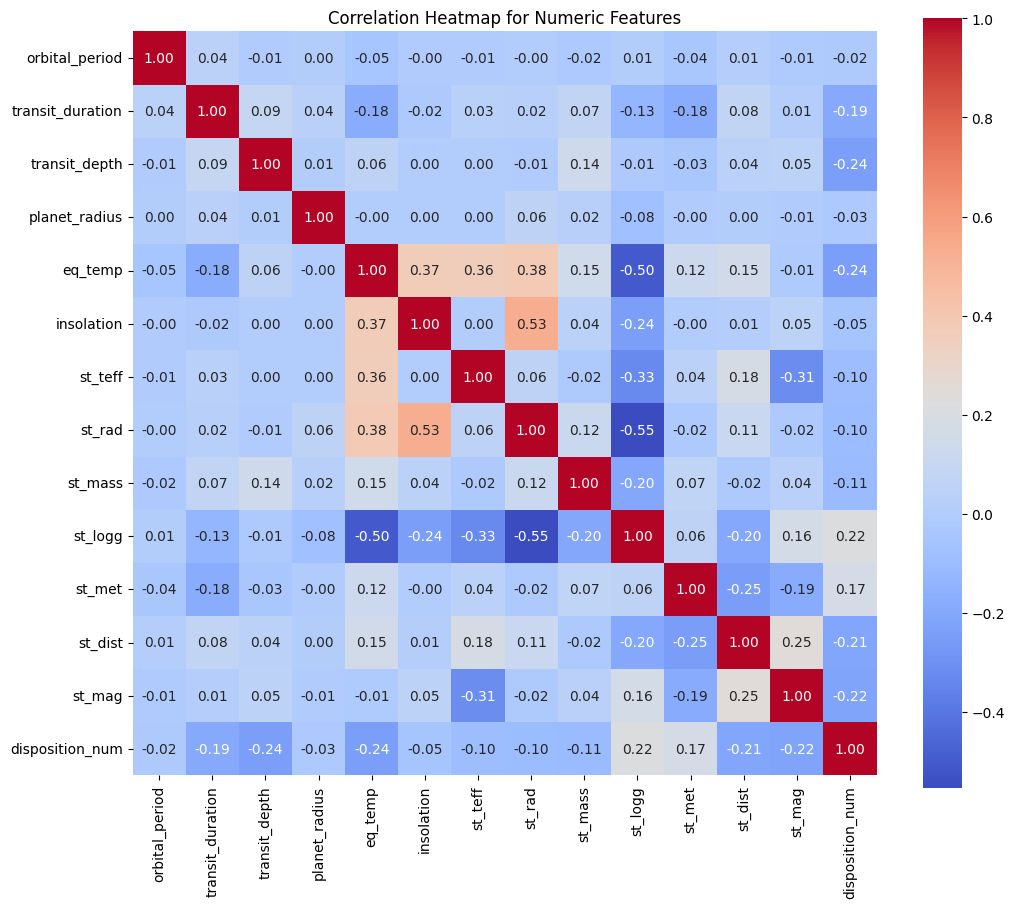

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# اختيار الأعمدة الرقمية بس
numeric_cols = df.select_dtypes(include='number').columns

# حساب correlation matrix
corr = df[numeric_cols].corr()

# رسم heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Heatmap for Numeric Features")
plt.show()


In [42]:
# شكل الداتا وأول 5 صفوف
print(df.shape)
print(df.head())

# معلومات عن كل العمود (نوع البيانات وnon-null)
print(df.info())

# إحصائيات لكل الأعمدة الرقمية
print(df.describe().T)


(21271, 15)
   orbital_period  transit_duration  transit_depth  planet_radius  eq_temp  \
0        9.488036           2.95750          615.8           2.26    793.0   
1       54.418383           4.50700          874.8           2.83    443.0   
2       19.899140           1.78220        10829.0          14.60    638.0   
3        1.736952           2.40641         8079.2          33.46   1395.0   
4        2.525592           1.65450          603.3           2.75   1406.0   

   insolation   st_teff  st_rad   st_mass  st_logg    st_met     st_dist  \
0       93.59  4790.628   0.927  0.779178    4.467 -0.060300  691.765800   
1        9.11  5140.000   0.927  0.510416    4.467 -0.201658  690.188200   
2       39.30  5251.962   0.868  0.910732    4.544 -0.216908  655.825260   
3      891.96  4926.284   0.791  0.834439    4.564  0.069248  568.625666   
4      926.16  5495.888   1.046  0.857153    4.438 -0.000965  381.243000   

     st_mag     disposition  disposition_num  
0  15.57496    

In [43]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage.sort_values(ascending=False))


disposition         36.213624
transit_duration     0.000000
orbital_period       0.000000
planet_radius        0.000000
eq_temp              0.000000
insolation           0.000000
transit_depth        0.000000
st_teff              0.000000
st_rad               0.000000
st_logg              0.000000
st_mass              0.000000
st_met               0.000000
st_dist              0.000000
st_mag               0.000000
disposition_num      0.000000
dtype: float64


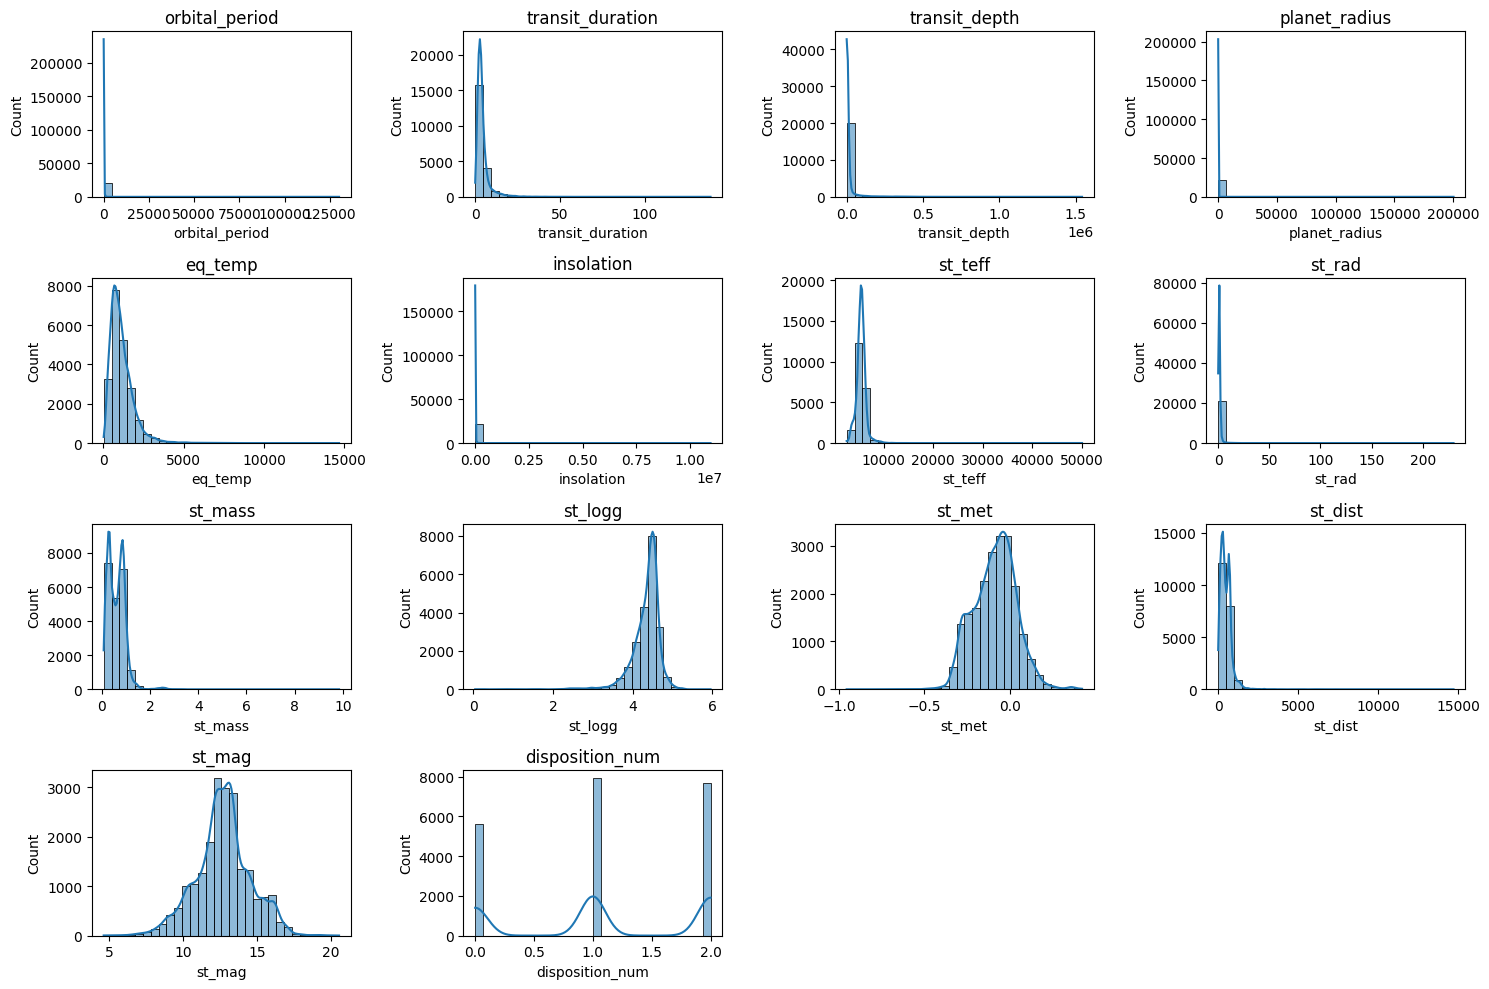

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


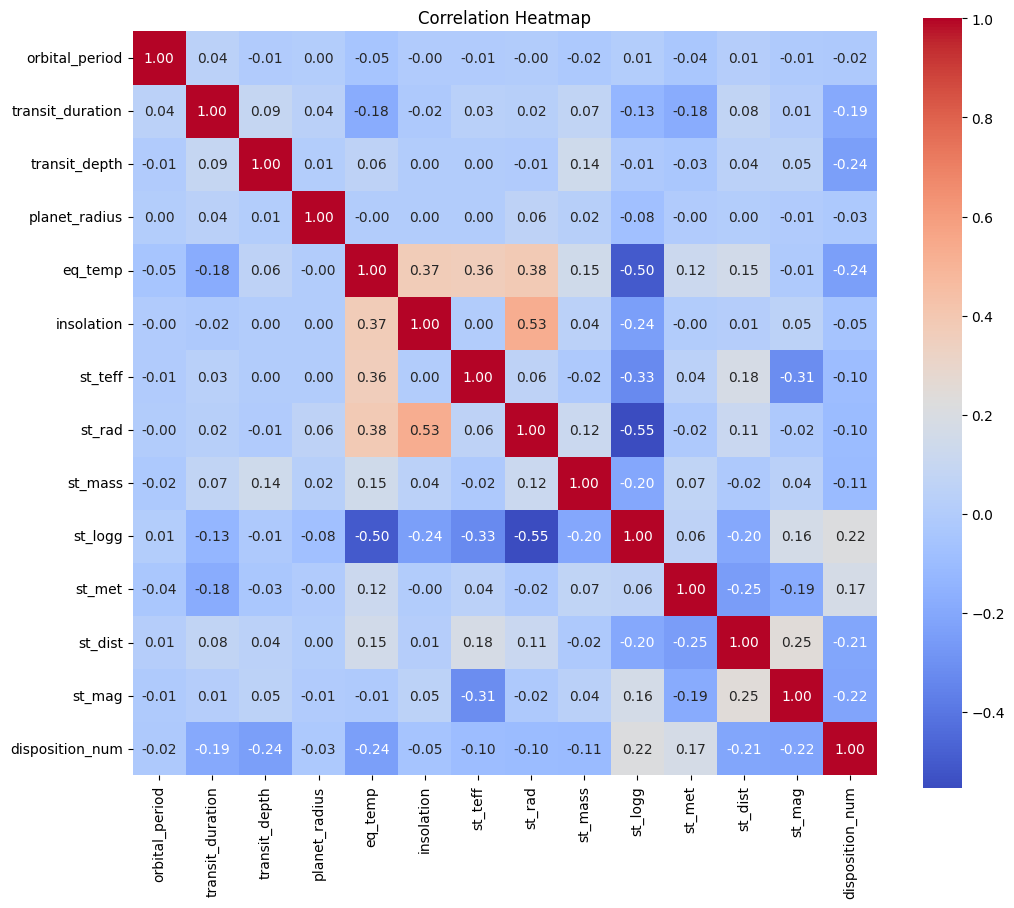

In [45]:
plt.figure(figsize=(12,10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


عدد كل class:
 disposition_num
1.0    7940
2.0    7690
0.0    5641
Name: count, dtype: int64

النسب المئوية لكل class:
 disposition_num
1.0    37.327817
2.0    36.152508
0.0    26.519675
Name: proportion, dtype: float64


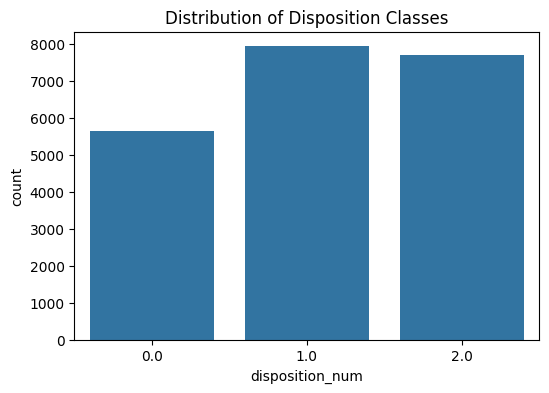

In [46]:
# عدد كل class + النسبة
class_counts = df['disposition_num'].value_counts()
class_percentage = df['disposition_num'].value_counts(normalize=True) * 100

print("عدد كل class:\n", class_counts)
print("\nالنسب المئوية لكل class:\n", class_percentage)

# رسم bar plot للنسب
plt.figure(figsize=(6,4))
sns.countplot(x='disposition_num', data=df)
plt.title("Distribution of Disposition Classes")
plt.show()


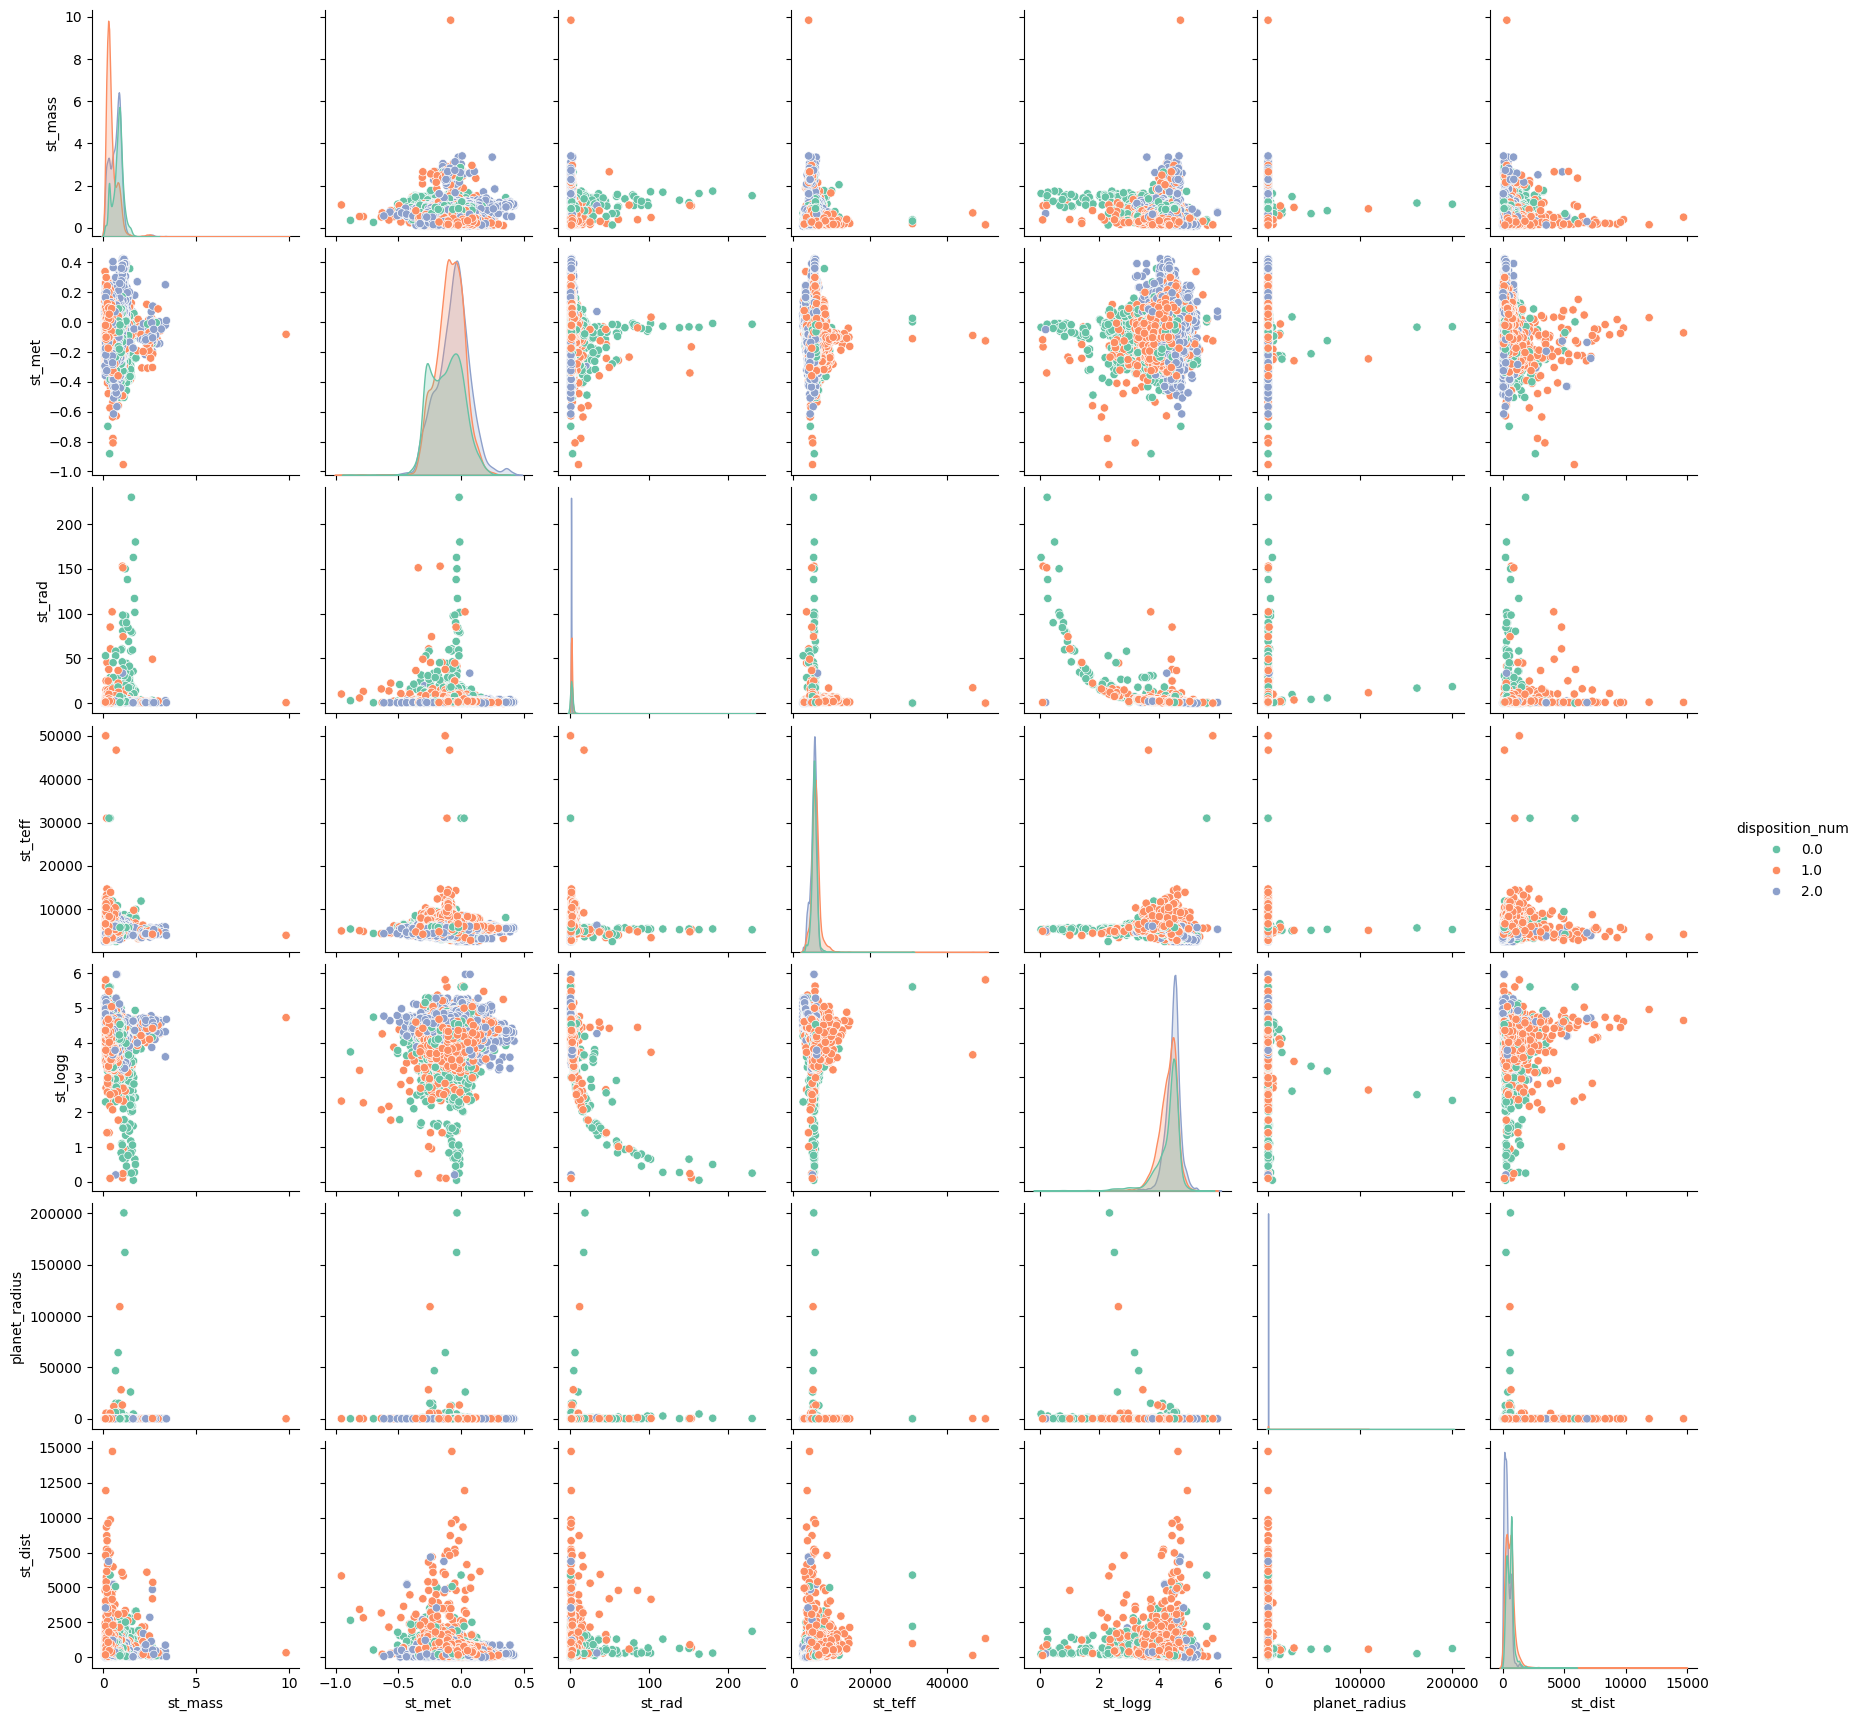

In [47]:
important_features = ['st_mass', 'st_met', 'st_rad', 'st_teff', 'st_logg', 'planet_radius', 'st_dist']

sns.pairplot(df, vars=important_features, hue='disposition_num', palette='Set2')
plt.show()


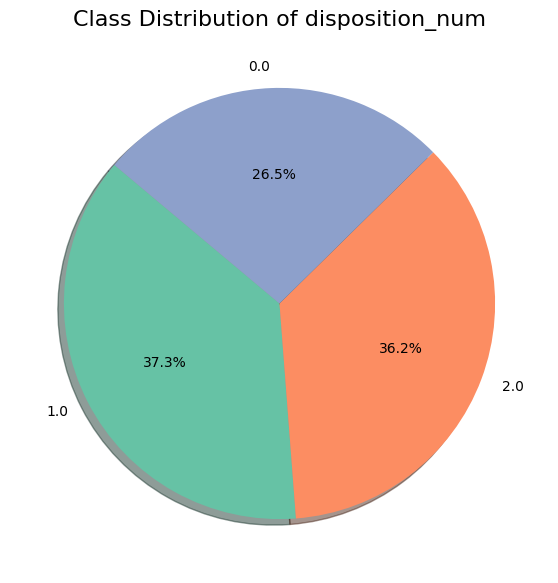

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب النسب لكل class
class_percentage = df['disposition_num'].value_counts(normalize=True) * 100

# اختيار ألوان من Seaborn
colors = sns.color_palette("Set2", len(class_percentage))

# رسم Pie Chart
plt.figure(figsize=(7,7))
plt.pie(class_percentage, labels=class_percentage.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title("Class Distribution of disposition_num", fontsize=16)
plt.show()


In [49]:
import numpy as np
import pandas as pd

# نسخة من الداتا
processed_df = df.copy()

# 1️⃣ Log-transform للـ skewed features
skewed_features = ['transit_depth', 'planet_radius', 'insolation']
for col in skewed_features:
    processed_df[col+'_log'] = np.log1p(processed_df[col])

# 2️⃣ Feature engineering
processed_df['radius_ratio'] = processed_df['planet_radius'] / processed_df['st_rad']
processed_df['log_orbital_period'] = np.log10(processed_df['orbital_period'] + 1e-5)  # لتجنب صفر
processed_df['normalized_transit_depth'] = processed_df['transit_depth'] / processed_df['st_mag']

# ✅ النتيجة جاهزة للتدريب على XGBoost
processed_df.head()


,orbital_period,transit_duration,transit_depth,planet_radius,eq_temp,insolation,st_teff,st_rad,st_mass,st_logg,...,st_dist,st_mag,disposition,disposition_num,transit_depth_log,planet_radius_log,insolation_log,radius_ratio,log_orbital_period,normalized_transit_depth
0,9.488036,2.95750,615.8,2.26,793.0,93.59,4790.628,0.927,0.779178,4.467,...,691.765800,15.57496,CONFIRMED,2.0,6.424545,1.181727,4.549552,2.437972,0.977177,39.537822
1,54.418383,4.50700,874.8,2.83,443.0,9.11,5140.000,0.927,0.510416,4.467,...,690.188200,12.30760,CONFIRMED,2.0,6.775138,1.342865,2.313525,3.052859,1.735746,71.078033
2,19.899140,1.78220,10829.0,14.60,638.0,39.30,5251.962,0.868,0.910732,4.544,...,655.825260,12.82000,CANDIDATE,1.0,9.290075,2.747271,3.696351,16.820276,1.298835,844.695788
3,1.736952,2.40641,8079.2,33.46,1395.0,891.96,4926.284,0.791,0.834439,4.564,...,568.625666,14.64540,FALSE POSITIVE,0.0,8.997172,3.539799,6.794542,42.300885,0.239790,551.654444
4,2.525592,1.65450,603.3,2.75,1406.0,926.16,5495.888,1.046,0.857153,4.438,...,381.243000,13.29600,CONFIRMED,2.0,6.404071,1.321756,6.832126,2.629063,0.402365,45.374549


In [50]:
processed_df.describe()

,orbital_period,transit_duration,transit_depth,planet_radius,eq_temp,insolation,st_teff,st_rad,st_mass,st_logg,st_met,st_dist,st_mag,disposition_num,transit_depth_log,planet_radius_log,insolation_log,radius_ratio,log_orbital_period,normalized_transit_depth
count,21271.000000,21271.000000,2.127100e+04,21271.000000,21271.000000,2.127100e+04,21271.000000,21271.000000,21271.000000,21271.000000,21271.000000,21271.000000,21271.000000,21271.000000,21271.000000,21271.000000,21271.000000,21271.000000,21271.000000,21271.000000
mean,48.711453,4.364173,1.554965e+04,52.629332,1133.369157,6.226150e+03,5432.506225,1.517464,0.615292,4.344124,-0.085877,494.964921,12.714895,1.096328,7.468270,1.989911,5.373304,18.962679,0.877099,1208.209458
std,1068.058880,4.706280,5.693750e+04,2028.014914,756.260506,1.221483e+05,1119.650185,4.374753,0.357885,0.370758,0.125009,444.531890,1.855208,0.785794,2.041809,1.121703,2.383396,241.948687,0.694765,4395.942288
min,0.152076,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,2520.000000,0.109000,0.080142,0.047000,-0.954414,6.531270,4.627800,0.000000,0.000000,0.076961,0.000000,0.145719,-0.817911,0.000000
25%,2.644922,2.264000,3.806700e+02,1.980000,641.000000,4.268000e+01,4946.700000,0.816200,0.311157,4.210000,-0.171800,243.753100,11.680250,0.000000,5.944556,1.091923,3.776890,2.061159,0.422415,30.616170
50%,5.904128,3.297435,1.351868e+03,4.600000,971.000000,2.210280e+02,5434.800000,1.027000,0.606010,4.430000,-0.077366,421.410600,12.727000,1.000000,7.209982,1.722767,5.402804,4.173729,0.771156,114.613022
75%,16.852890,4.775828,7.745580e+03,13.804583,1443.144702,1.094445e+03,5894.750000,1.463000,0.857844,4.552800,-0.001871,684.986100,13.731800,2.000000,8.955007,2.694937,6.998916,10.977974,1.226675,631.981483
max,129995.778400,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,50000.000000,229.908000,9.841992,5.960650,0.423852,14728.300000,20.556100,2.000000,14.248202,12.207806,16.208627,10905.882353,5.113929,120943.443601


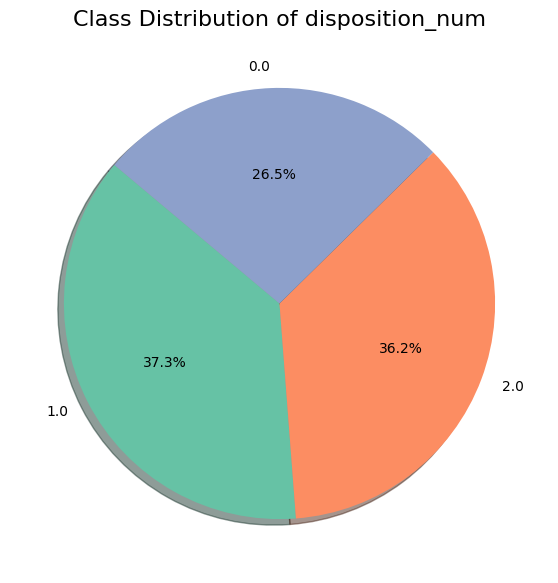

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب النسب لكل class
class_percentage = processed_df['disposition_num'].value_counts(normalize=True) * 100

# اختيار ألوان من Seaborn
colors = sns.color_palette("Set2", len(class_percentage))

# رسم Pie Chart
plt.figure(figsize=(7,7))
plt.pie(class_percentage, labels=class_percentage.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title("Class Distribution of disposition_num", fontsize=16)
plt.show()


عدد كل class:
 disposition_num
1.0    7940
2.0    7690
0.0    5641
Name: count, dtype: int64

النسب المئوية لكل class:
 disposition_num
1.0    37.327817
2.0    36.152508
0.0    26.519675
Name: proportion, dtype: float64


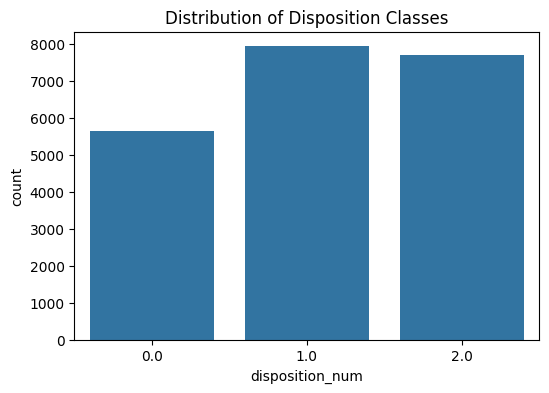

In [52]:
# عدد كل class + النسبة
class_counts = processed_df['disposition_num'].value_counts()
class_percentage = processed_df['disposition_num'].value_counts(normalize=True) * 100

print("عدد كل class:\n", class_counts)
print("\nالنسب المئوية لكل class:\n", class_percentage)

# رسم bar plot للنسب
plt.figure(figsize=(6,4))
sns.countplot(x='disposition_num', data=df)
plt.title("Distribution of Disposition Classes")
plt.show()


In [53]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print("Number of outliers per column (IQR method):")
print(outliers_iqr.sum())


Number of outliers per column (IQR method):
orbital_period      2982
transit_duration    1711
transit_depth       2391
planet_radius       2011
eq_temp              786
insolation          3135
st_teff             1223
st_rad              1467
st_mass              173
st_logg             1004
st_met               173
st_dist              458
st_mag               627
disposition_num        0
dtype: int64


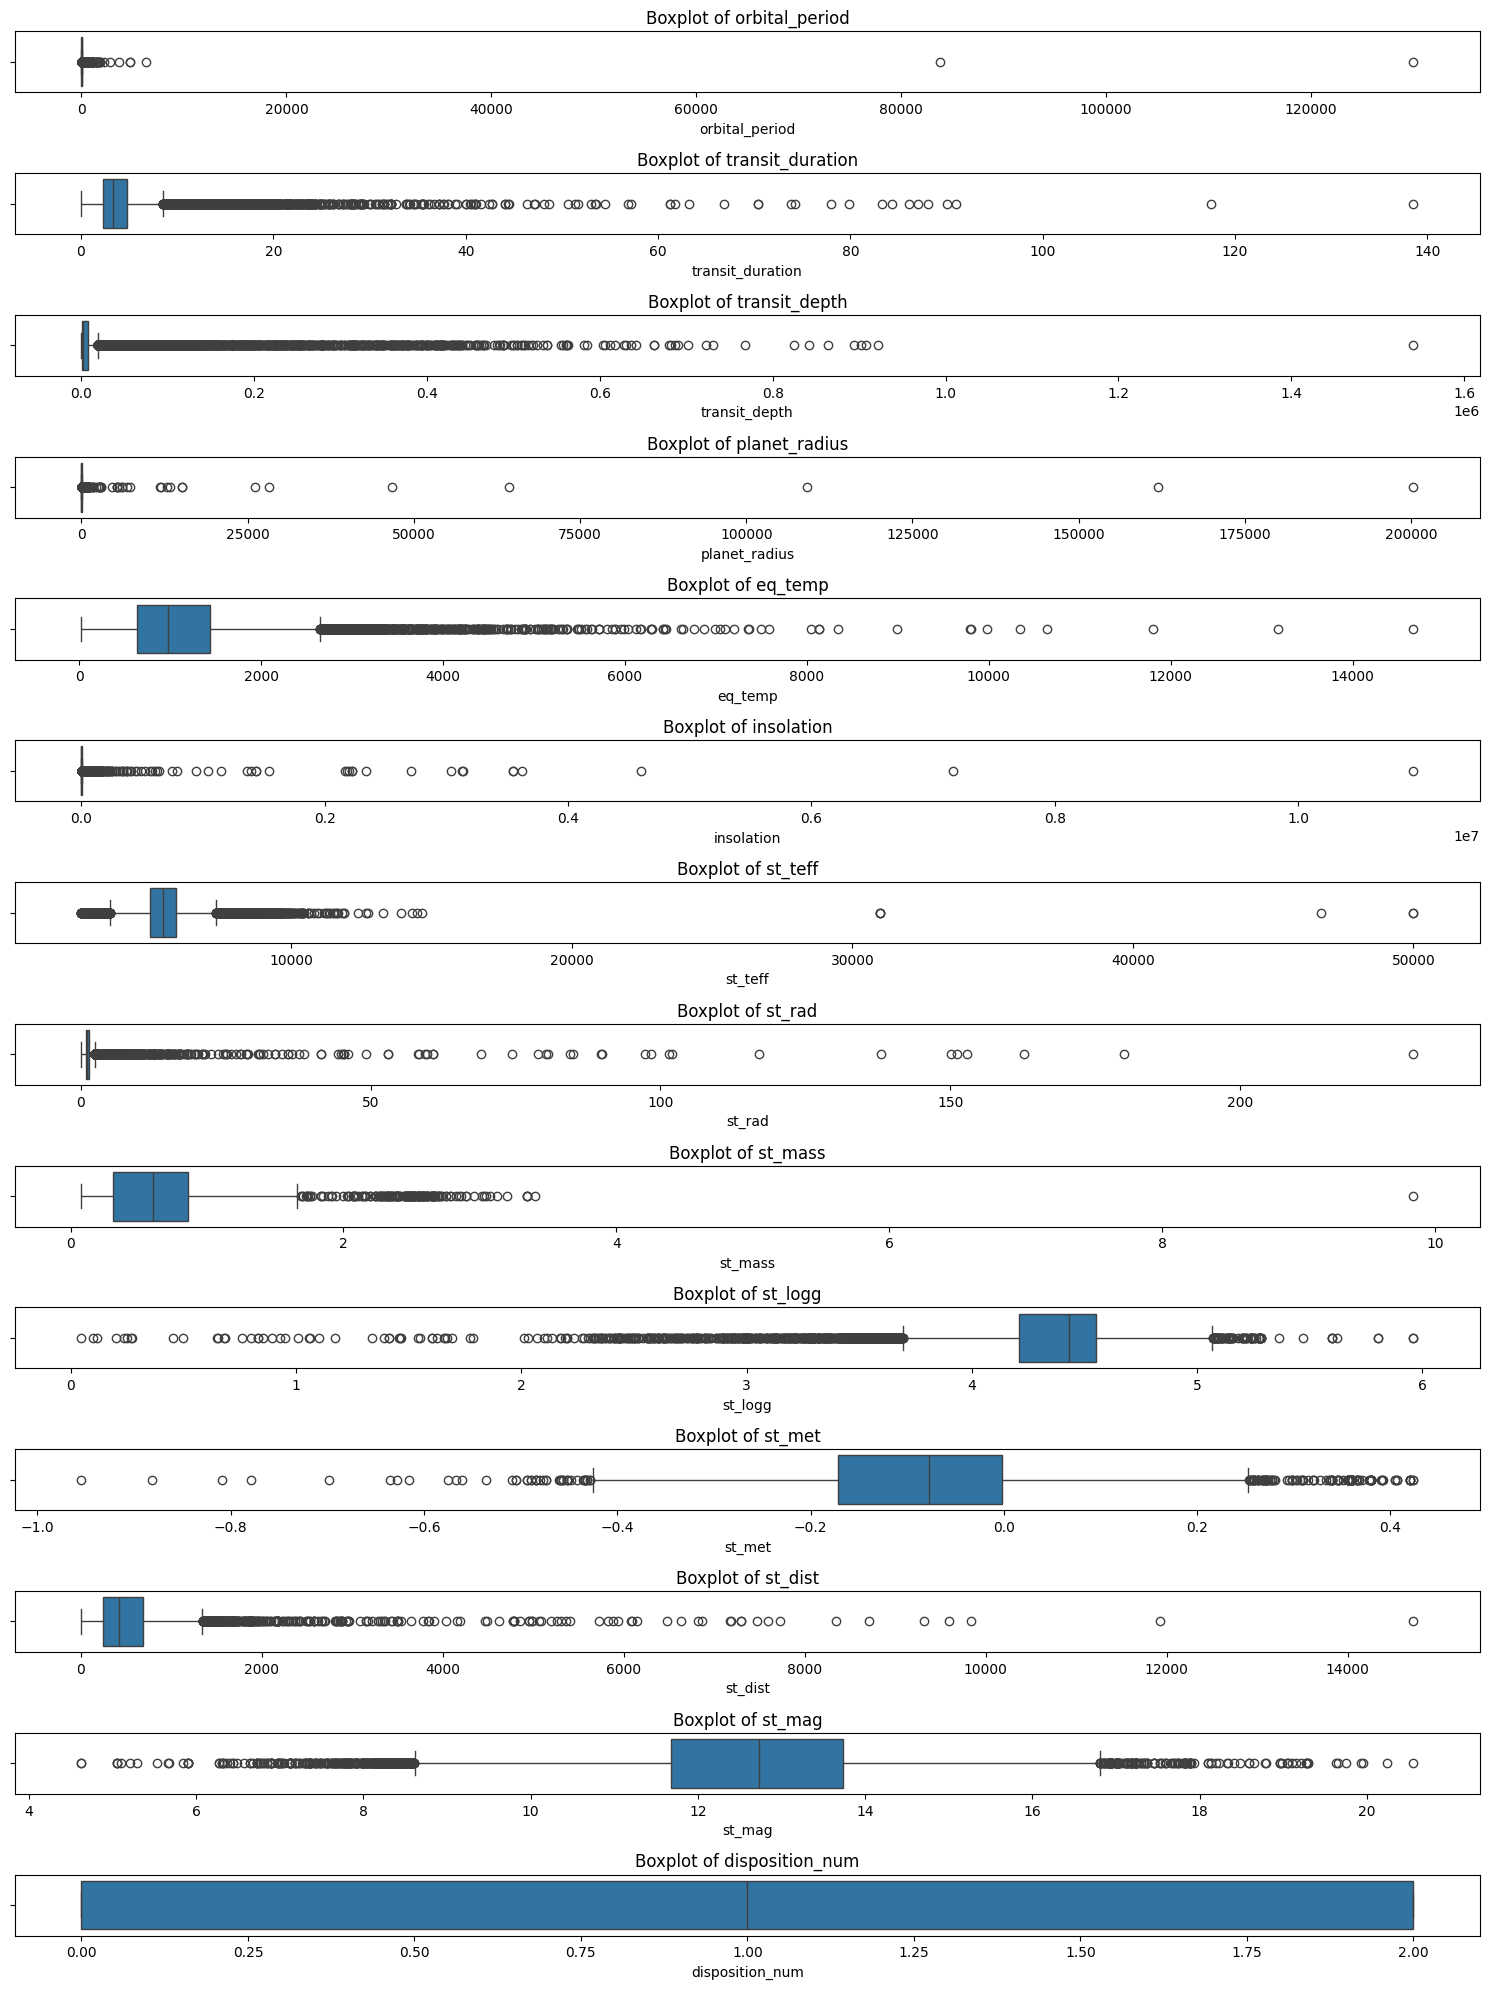

In [54]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [55]:
# تحديد عمود الهدف
Y = processed_df['disposition_num']

# تحديد الميزات (Features)
# يتم استبعاد:
# - 'disposition' و 'disposition_num' (عمود الهدف)
# - الأعمدة الأصلية التي تم تحويلها (لأننا سنستخدم النسخ اللوغاريتمية)
columns_to_drop = [
    'disposition', 'disposition_num', 'transit_depth', 'planet_radius',
    'insolation', 'orbital_period'
]
X = processed_df.drop(columns=columns_to_drop, errors='ignore')

# ⚠️ ملاحظة: يجب التأكد من إزالة أي أعمدة أخرى تم تحويلها لوغاريتمياً (مثل st_dist) إذا لم تظهر في القائمة أعلاه.
# يجب أن تبقى الأعمدة الجديدة فقط: 'transit_depth_log', 'planet_radius_log', 'insolation_log', 'log_orbital_period', 'radius_ratio', 'normalized_transit_depth'

In [67]:
from sklearn.model_selection import train_test_split

# 1. التقسيم الأولي: فصل مجموعة الاختبار (20%)
# X_train_val و Y_train_val تحتوي الآن على 80% من البيانات
X_train_val, X_test, Y_train_val, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    # stratify=Y_temp
)

# 2. التقسيم الثاني: فصل مجموعة التحقق (25% من الـ 80% المتبقية = 20% من الإجمالي)
# هذا سيقسم X_train_val إلى 75% تدريب و 25% تحقق.
# (0.25 / 0.80 = 0.25، لذا نستخدم test_size=0.25)
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train_val, Y_train_val,
    test_size=0.25,  # 0.25 * 0.80 = 0.20 (20% من البيانات الأصلية)
    random_state=42,
    # stratify=Y_train_val
)

print(f"حجم بيانات التدريب (Train): {X_train.shape[0]}")
print(f"حجم بيانات التحقق (Validation): {X_val.shape[0]}")
print(f"حجم بيانات الاختبار (Test): {X_test.shape[0]}")

حجم بيانات التدريب (Train): 12762
حجم بيانات التحقق (Validation): 4254
حجم بيانات الاختبار (Test): 4255


In [72]:
!pip install --upgrade xgboost


In [83]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=Y_train)
dval = xgb.DMatrix(X_val, label=Y_val)

params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'learning_rate': 0.05,
    'max_depth': 6,
    'seed': 42,
    'subsample': 0.8,           # اخذ 80% من الصفوف لكل شجرة
    'colsample_bytree': 0.8,    # اخذ 80% من الأعمدة لكل شجرة
    'colsample_bylevel': 0.8    # اختياري: أعمدة لكل level
}

evals = [(dtrain, 'train'), (dval, 'eval')]

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=True
)

# التنبؤ على Test
dtest = xgb.DMatrix(X_test)
y_pred = bst.predict(dtest)


KeyError: 'planet_radius'

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

# ⚠️ ملاحظة: يجب أن نستخدم واجهة Scikit-learn (XGBClassifier) لتتوافق مع RandomizedSearchCV
# سنستخدم X_train_val و Y_train_val (بيانات التدريب والتحقق المدمجة) لتغذية الـ CV
# ثم سنقوم بالتحقق النهائي على X_test

# 1. تحديد مساحة البحث (Hyperparameter Grid)
param_grid = {
    'n_estimators': [300, 500, 700],         # عدد الأشجار (أقل من 1000 بسبب الإيقاف المبكر)
    'max_depth': [5, 7, 9],                  # أقصى عمق للشجرة (يتحكم في التعقيد)
    'learning_rate': [0.01, 0.05, 0.1],      # معدل التعلم
    'gamma': [0.1, 0.5, 1],                  # الحد الأدنى لخسارة الانقسام
    'subsample': [0.7, 0.8, 0.9],            # أخذ عينات من الصفوف
    'colsample_bytree': [0.7, 0.8, 0.9]      # أخذ عينات من الأعمدة
}

# 2. تهيئة نموذج XGBClassifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# 3. إعداد البحث العشوائي (Randomized Search)
# n_iter=50 يعني اختبار 50 توليفة مختلفة من المعلمات
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,                       # عدد التوليفات التي سيتم اختبارها
    scoring='accuracy',              # المقياس الذي نستخدمه للتحسين
    cv=5,                            # التحقق المتقاطع بخمسة أجزاء
    verbose=1,
    random_state=42,
    n_jobs=-1                        # استخدام جميع أنوية المعالج
)

# 4. تشغيل البحث (هذا يستغرق بعض الوقت)
# نستخدم X_train_val و Y_train_val (الـ 80% من البيانات)
random_search.fit(X_train_val, Y_train_val)

print("✅ تم الانتهاء من البحث العشوائي.")
print(f"أفضل دقة للتحقق المتقاطع: {random_search.best_score_ * 100:.2f}%")
print("أفضل المعلمات التي تم العثور عليها:")
print(random_search.best_params_)

# 5. استخراج أفضل نموذج
best_xgb_model = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:44:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ تم الانتهاء من البحث العشوائي.
أفضل دقة للتحقق المتقاطع: 79.17%
أفضل المعلمات التي تم العثور عليها:
{'subsample': 0.7, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.8}


In [85]:
# التوقع باستخدام أفضل نموذج تم العثور عليه
Y_pred_tuned = best_xgb_model.predict(X_test)

# حساب الدقة النهائية
tuned_accuracy = accuracy_score(Y_test, Y_pred_tuned)
print(f"\n✨ دقة النموذج النهائية بعد التحسين (Tuned Accuracy): {tuned_accuracy * 100:.2f}%")

# تقرير التصنيف بعد التحسين (لتري مقارنة مع النتائج القديمة)
labels = ['FALSE POSITIVE', 'CANDIDATE', 'CONFIRMED']
print("\n-------------------------------------------")
print("📝 تقرير التصنيف بعد التحسين:")
print(classification_report(Y_test, Y_pred_tuned, target_names=labels))


✨ دقة النموذج النهائية بعد التحسين (Tuned Accuracy): 77.56%

-------------------------------------------
📝 تقرير التصنيف بعد التحسين:
                precision    recall  f1-score   support

FALSE POSITIVE       0.78      0.75      0.76      1120
     CANDIDATE       0.78      0.72      0.75      1635
     CONFIRMED       0.76      0.85      0.81      1500

      accuracy                           0.78      4255
     macro avg       0.78      0.78      0.77      4255
  weighted avg       0.78      0.78      0.77      4255



In [90]:
import joblib
from google.colab import files
import os

# ⚠️ نستخدم أفضل نموذج تم العثور عليه (بافتراض أن هذا هو النموذج الذي تريدين حفظه)
# يجب أن يكون المتغير 'model' أو 'best_xgb_model' معرفًا في هذه النقطة.
# سنفترض أن المتغير هو 'best_xgb_model' بناءً على مناقشتنا السابقة.

# 1. تحديد اسم الملف
model_filename = 'best_tuned_exoplanet_classifier_model.pkl' # استخدمي الاسم الذي اتفقنا عليه

# 2. حفظ النموذج في بيئة Colab (أو البيئة السحابية)
# نفترض أن 'best_xgb_model' هو المتغير الذي يحمل النموذج المُدرب
try:
    joblib.dump(best_xgb_model, model_filename)
    print(f"\n✅ تم حفظ النموذج بنجاح في مجلد العمل السحابي باسم: {model_filename}")
    print(f"حجم ملف النموذج: {os.path.getsize(model_filename) / (1024*1024):.2f} ميجابايت")

    # 3. تنزيل الملف على جهازك المحلي
    print("\n⬇️ جاري تنزيل الملف... يرجى الانتظار حتى تظهر نافذة التنزيل في المتصفح.")
    files.download(model_filename)

except NameError:
    print("❌ خطأ: المتغير 'best_xgb_model' غير مُعرَّف. يرجى التأكد من تشغيل كل أكواد التدريب والتحسين قبل هذه الخطوة.")
except Exception as e:
    print(f"حدث خطأ أثناء الحفظ أو التنزيل: {e}")


✅ تم حفظ النموذج بنجاح في مجلد العمل السحابي باسم: best_tuned_exoplanet_classifier_model.pkl
حجم ملف النموذج: 6.50 ميجابايت

⬇️ جاري تنزيل الملف... يرجى الانتظار حتى تظهر نافذة التنزيل في المتصفح.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>